In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns
import tslearn
import sklearn
from utilities import *
from tslearn.clustering import TimeSeriesKMeans;


c:\Users\maurizio\anaconda\lib\site-packages\tslearn\clustering\kmeans.py:16: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  warnings.warn(


# import and pre-processing

In [3]:
df = pd.read_csv('../dati/serie-storiche-ecommerce.csv', quotechar = "'", parse_dates = ['data'], decimal = ',')

In [4]:
processed_df = pivot_scale_and_fillna(df).reset_index()
df_for_clustering = processed_df.drop(columns = ['data']).T.to_numpy()[..., np.newaxis]

# clustering

In [5]:
n_clusters = np.array([2,3,4,5,6,7,8,9,10,11,12,13,14,15])
select_optimal_n_clusters(n_clusters, df_for_clustering = df_for_clustering)
km = TimeSeriesKMeans(select_optimal_n_clusters(n_clusters, df_for_clustering = df_for_clustering) , metric="euclidean", max_iter=5, max_iter_barycenter=5, random_state=0)

In [6]:
sector_associated_to_clusters = associate_sector_to_category(cluster_predicted, 7, df)
print(sector_associated_to_clusters)

{0: ['Baseball', 'Fitness'], 1: ['Nuoto', 'Pesca', 'Basket', 'Arti marziali'], 2: ['Danza', 'Ciclismo', 'Volley', 'Soft air', 'Trekking', 'Freccette'], 3: ['Arceria', 'Rugby', 'Running', 'Intimo', 'Subacquea', 'Pattini', 'Skateboard', 'Golf', 'Padel'], 4: ['Mare', 'Ping-pong'], 5: ['Calcio', 'Snowboard', 'Sci'], 6: ['Bambino', 'Tennis', 'Casual', 'Buoni / acconti']}


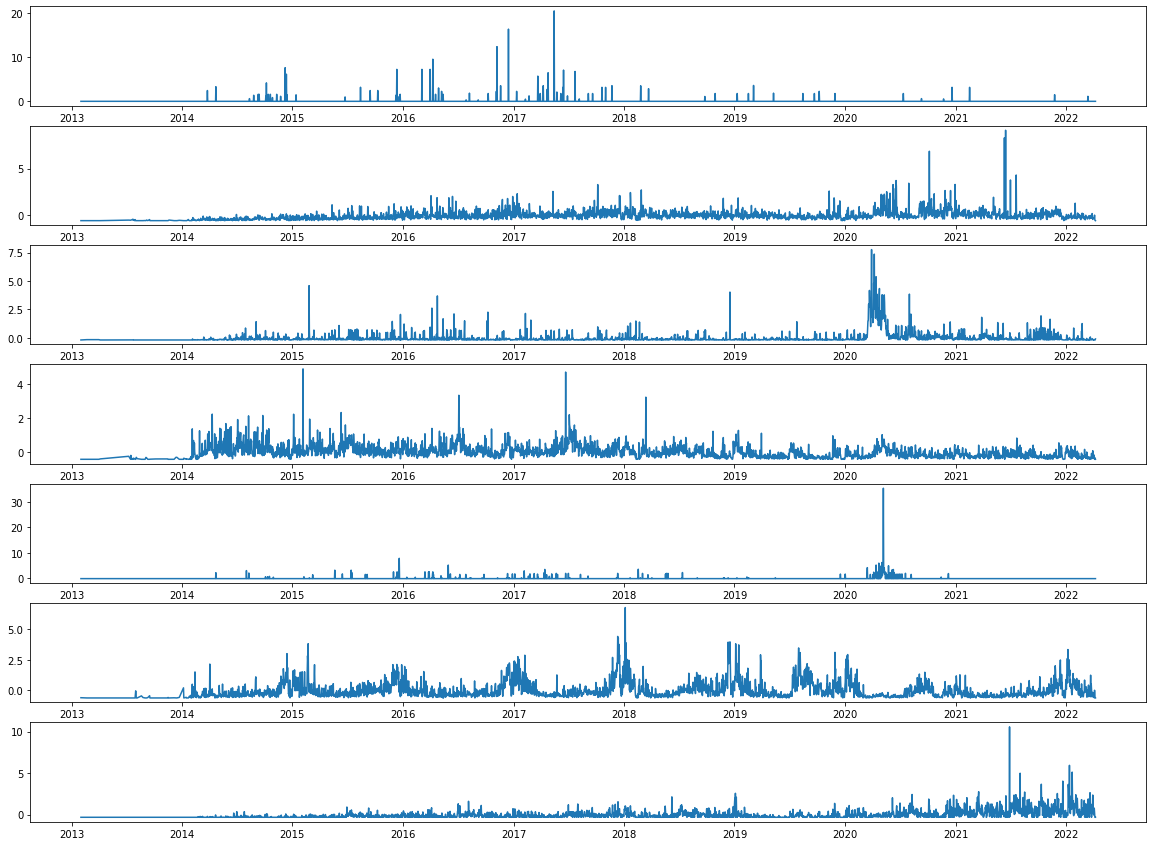

In [7]:
plot_clusters(7, km_fitted, processed_df = processed_df)

In [8]:
tslearn.clustering.silhouette_score(df_for_clustering, cluster_predicted, metric="euclidean")

0.023851280333156637